Identifying Shopping Trends using Data Analysis

In [1]:
!pip install WordCloud

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Techsaksham/Dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
df.shape

(3900, 18)

In [11]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [12]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [14]:
# Create a dictionary of column names and their unique values
unique_values = {
    'Gender': df['Gender'].unique(),
    'Category': df['Category'].unique(),
    'Size': df['Size'].unique(),
    'Subscription Status': df['Subscription Status'].unique(),
    'Shipping Type': df['Shipping Type'].unique(),
    'Discount Applied': df['Discount Applied'].unique(),
    'Promo Code Used': df['Promo Code Used'].unique(),
    'Payment Method': df['Payment Method'].unique()
}

# Convert the dictionary to a DataFrame for better presentation
unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values.items()]))

# Display the DataFrame
print(unique_values_df)

   Gender     Category Size Subscription Status   Shipping Type  \
0    Male     Clothing    L                 Yes         Express   
1  Female     Footwear    S                  No   Free Shipping   
2     NaN    Outerwear    M                 NaN    Next Day Air   
3     NaN  Accessories   XL                 NaN        Standard   
4     NaN          NaN  NaN                 NaN  2-Day Shipping   
5     NaN          NaN  NaN                 NaN    Store Pickup   

  Discount Applied Promo Code Used Payment Method  
0              Yes             Yes          Venmo  
1               No              No           Cash  
2              NaN             NaN    Credit Card  
3              NaN             NaN         PayPal  
4              NaN             NaN  Bank Transfer  
5              NaN             NaN     Debit Card  


In [15]:
# List of columns for which we want to get value counts
columns = ['Gender', 'Category', 'Size', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method']

# Loop through each column and display value counts
for column in columns:
    print(f"Value counts for '{column}':")
    print(df[column].value_counts())
    print()  # Blank line for separation


Value counts for 'Gender':
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Value counts for 'Category':
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Value counts for 'Size':
Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

Value counts for 'Subscription Status':
Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

Value counts for 'Shipping Type':
Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

Value counts for 'Discount Applied':
Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

Value counts for 'Promo Code Used':
Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64

Value counts for 'Payment Method':
Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Ven

In [16]:
# Get summary statistics of the 'Age' column
age_summary = df['Age'].describe()
print(age_summary)

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64


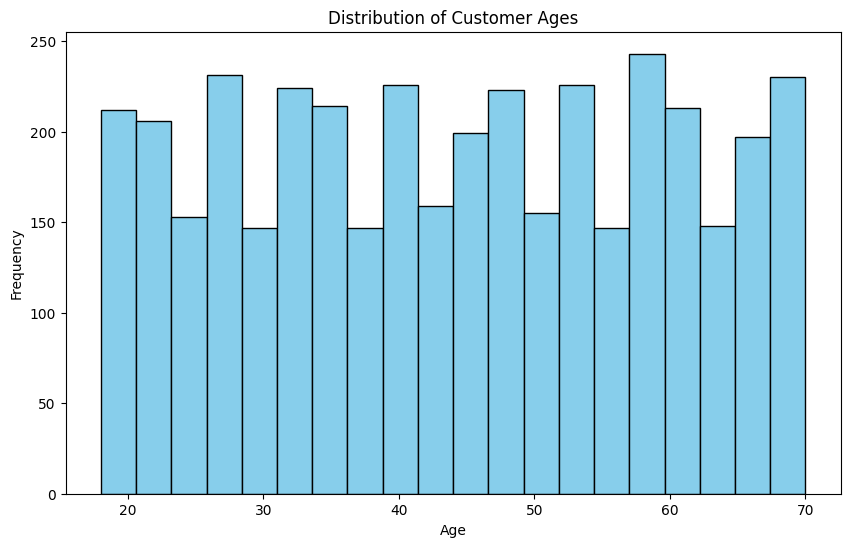

In [17]:
# Plot a histogram to visualize the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [18]:
df['Age_category'] = pd.cut(df['Age'],
                             bins=[0, 12, 18, 35, 50, 65, 100],
                             labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior'])


In [19]:
# Create a histogram to show the distribution of Age categories
fig = px.histogram(df, x='Age_category', color='Age_category', title='Distribution of Age Categories')

# Show the plot
fig.show()


In [20]:
df['Category'].unique()
print(df['Category'].unique())

['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [21]:
df[['Category','Purchase Amount (USD)']]

,Category,Purchase Amount (USD)
0,Clothing,53
1,Clothing,64
2,Clothing,73
3,Footwear,90
4,Clothing,49
...,...,...
3895,Clothing,28
3896,Accessories,49
3897,Accessories,33
3898,Footwear,77


In [22]:
df.groupby('Category')['Purchase Amount (USD)'].sum()

,Purchase Amount (USD)
Category,
Accessories,74200
Clothing,104264
Footwear,36093
Outerwear,18524


In [23]:
df.groupby('Category')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


In [24]:
# Group by 'Category' and calculate the total Purchase Amount (USD)
category_sum = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

# Plot the total Purchase Amount per Category
fig_sum = px.bar(category_sum, x='Category', y='Purchase Amount (USD)',
                 title='Total Purchase Amount by Category',
                 labels={'Purchase Amount (USD)': 'Total Purchase Amount (USD)', 'Category': 'Product Category'})
fig_sum.show()

In [25]:
# Group by 'Category' and calculate the average Purchase Amount (USD)
category_mean = df.groupby('Category')['Purchase Amount (USD)'].mean().reset_index()

# Plot the average Purchase Amount per Category
fig_mean = px.bar(category_mean, x='Category', y='Purchase Amount (USD)',
                  title='Average Purchase Amount by Category',
                  labels={'Purchase Amount (USD)': 'Average Purchase Amount (USD)', 'Category': 'Product Category'})
fig_mean.show()


<ipython-input-27-270636f05a3a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




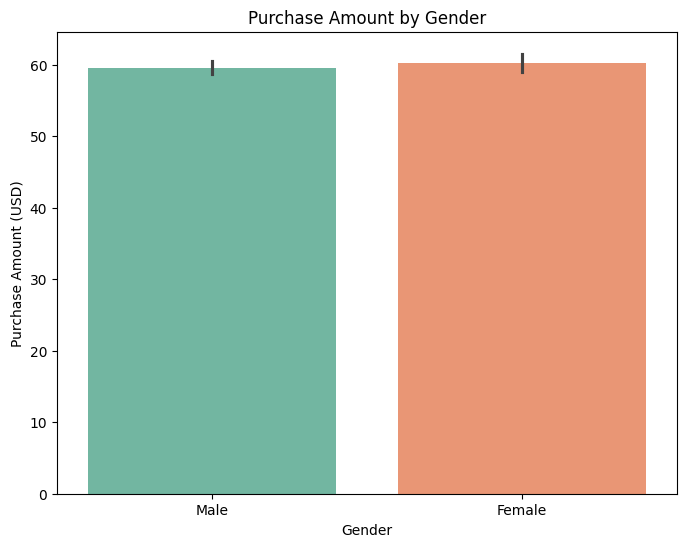

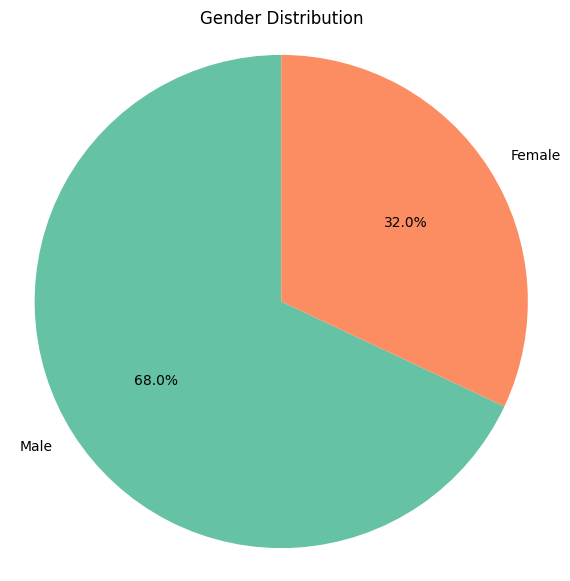

In [27]:

# Colorful Bar Plot
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Gender', y='Purchase Amount (USD)', palette='Set2')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Pie Chart for Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(gender_counts)))
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [28]:
# Group by 'Category' and get counts of 'Item Purchased' within each category
category_item_counts = df.groupby('Category')['Item Purchased'].value_counts().reset_index(name='Count')

# Display the result
print(category_item_counts)

       Category Item Purchased  Count
0   Accessories        Jewelry    171
1   Accessories           Belt    161
2   Accessories     Sunglasses    161
3   Accessories          Scarf    157
4   Accessories            Hat    154
5   Accessories        Handbag    153
6   Accessories       Backpack    143
7   Accessories         Gloves    140
8      Clothing         Blouse    171
9      Clothing          Pants    171
10     Clothing          Shirt    169
11     Clothing          Dress    166
12     Clothing        Sweater    164
13     Clothing          Socks    159
14     Clothing          Skirt    158
15     Clothing         Shorts    157
16     Clothing         Hoodie    151
17     Clothing        T-shirt    147
18     Clothing          Jeans    124
19     Footwear        Sandals    160
20     Footwear          Shoes    150
21     Footwear       Sneakers    145
22     Footwear          Boots    144
23    Outerwear         Jacket    163
24    Outerwear           Coat    161


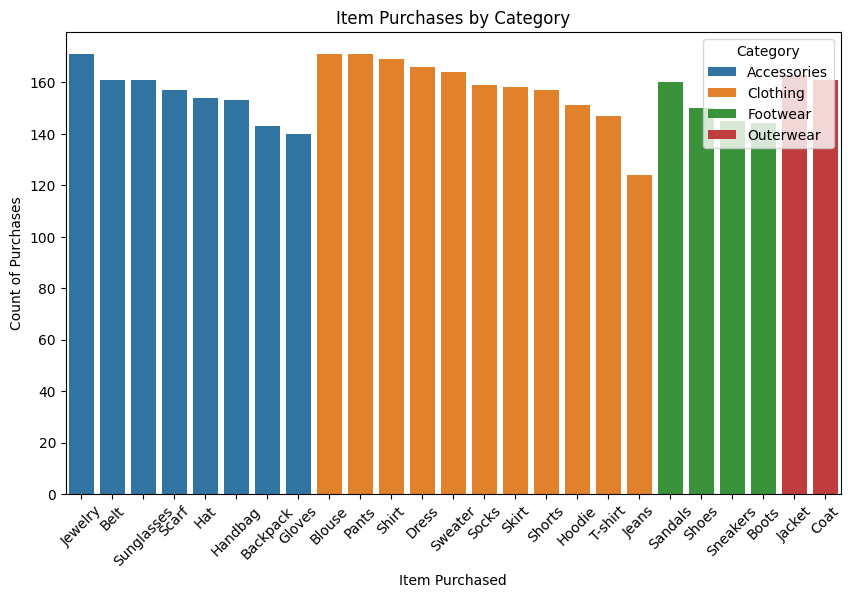

In [29]:
# Get the grouped data for plotting
category_item_counts = df.groupby('Category')['Item Purchased'].value_counts().reset_index(name='Count')

# Plot the data using a barplot
plt.figure(figsize=(10,6))
sns.barplot(data=category_item_counts, x='Item Purchased', y='Count', hue='Category')
plt.title('Item Purchases by Category')
plt.xticks(rotation=45)
plt.xlabel('Item Purchased')
plt.ylabel('Count of Purchases')
plt.show()

In [30]:
# Create a pivot table to get the counts of items purchased per category
pivot_table = df.pivot_table(index='Category', columns='Item Purchased', aggfunc='size', fill_value=0)

# Display the pivot table
print(pivot_table)

Item Purchased  Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Category                                                                      
Accessories          143   161       0      0     0      0     140      153   
Clothing               0     0     171      0     0    166       0        0   
Footwear               0     0       0    144     0      0       0        0   
Outerwear              0     0       0      0   161      0       0        0   

Item Purchased  Hat  Hoodie  ...  Scarf  Shirt  Shoes  Shorts  Skirt  \
Category                     ...                                       
Accessories     154       0  ...    157      0      0       0      0   
Clothing          0     151  ...      0    169      0     157    158   
Footwear          0       0  ...      0      0    150       0      0   
Outerwear         0       0  ...      0      0      0       0      0   

Item Purchased  Sneakers  Socks  Sunglasses  Sweater  T-shirt  
Category                    

In [31]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [33]:
# Get the count of unique values in the 'Season' column and reset the index for a cleaner display
season_counts = df['Season'].value_counts().reset_index(name='Count')

# Rename columns for clarity
season_counts.columns = ['Season', 'Count']

# Display the result
print(season_counts)

   Season  Count
0  Spring    999
1    Fall    975
2  Winter    971
3  Summer    955


<ipython-input-34-c2fc6f9d4ecd>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




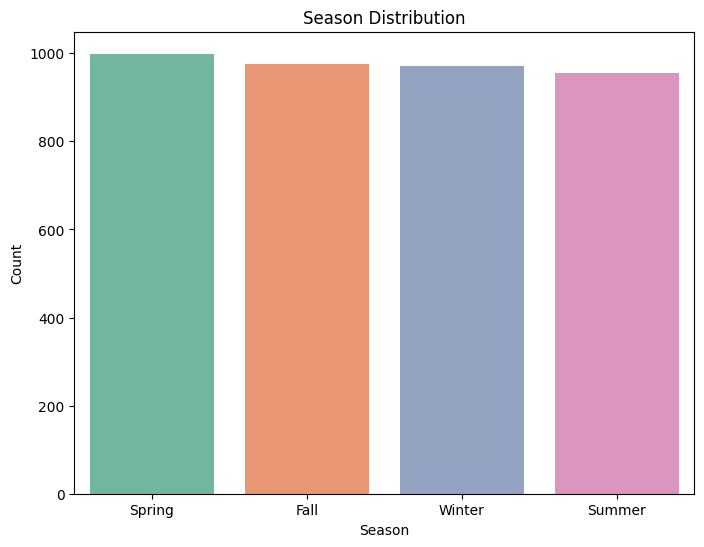

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the count of unique values in the 'Season' column
season_counts = df['Season'].value_counts()

# Create a bar plot to visualize the counts
plt.figure(figsize=(8,6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='Set2')

# Add labels and title
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

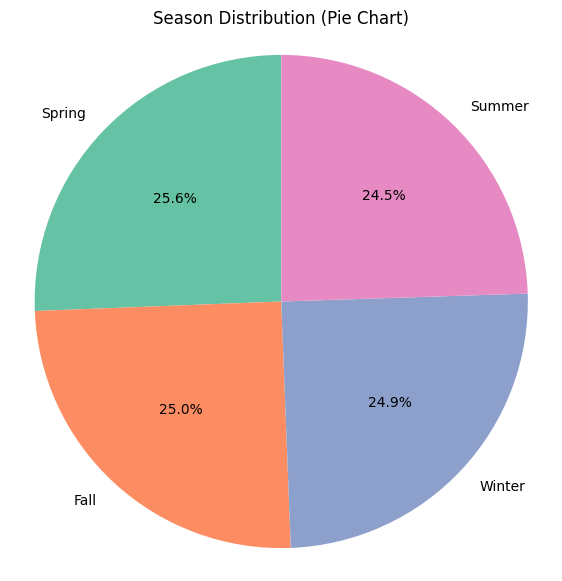

In [35]:
# Get the count of each unique value in the 'Season' column
season_counts = df['Season'].value_counts()

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(season_counts)))

# Add title
plt.title('Season Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [36]:
# Get the value counts and normalize to show percentages
season_percentages = df['Season'].value_counts(normalize=True) * 100

# Display the result
print(season_percentages)

Season
Spring    25.615385
Fall      25.000000
Winter    24.897436
Summer    24.487179
Name: proportion, dtype: float64


In [38]:
# Group by 'Category' and calculate the mean of 'Review Rating'
df_groupby = df.groupby('Category')['Review Rating'].mean().reset_index()

# Rename the column for clarity
df_groupby.columns = ['Category', 'Average Review Rating']

# Sort by the average review rating in descending order to see the highest-rated categories first
df_groupby = df_groupby.sort_values(by='Average Review Rating', ascending=False)

# Display the result
print(df_groupby)

      Category  Average Review Rating
2     Footwear               3.790651
0  Accessories               3.768629
3    Outerwear               3.746914
1     Clothing               3.723143


<ipython-input-40-356a56f5ab03>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




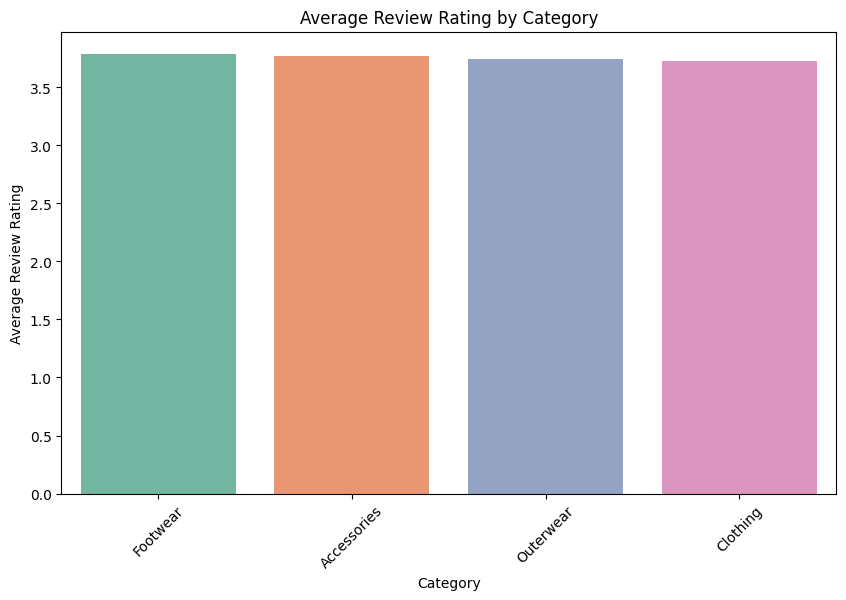

In [40]:
# Create a bar plot for the average review rating by category
plt.figure(figsize=(10, 6))
sns.barplot(data=df_groupby, x='Category', y='Average Review Rating', palette='Set2')

# Add labels and title
plt.title('Average Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Get the count of each unique value in the 'Subscription Status' column
subscription_counts = df['Subscription Status'].value_counts()

# Convert to a DataFrame for better readability
subscription_df = subscription_counts.reset_index(name='Count')

# Rename columns for clarity
subscription_df.columns = ['Subscription Status', 'Count']

# Calculate the percentage distribution of each status
subscription_df['Percentage'] = (subscription_df['Count'] / subscription_df['Count'].sum()) * 100

# Sort the DataFrame by 'Count' for better readability (optional)
subscription_df = subscription_df.sort_values(by='Count', ascending=False)

# Display the result
print(subscription_df)

  Subscription Status  Count  Percentage
0                  No   2847        73.0
1                 Yes   1053        27.0


<ipython-input-42-816b11fa9d6b>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




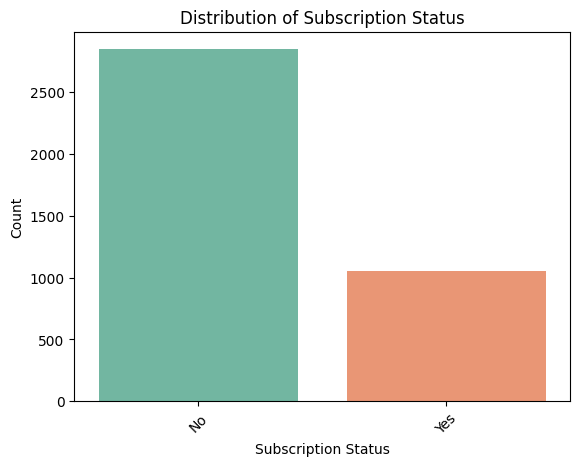

In [42]:
sns.barplot(x=subscription_df['Subscription Status'], y=subscription_df['Count'], palette='Set2')

# Add labels and title
plt.title('Distribution of Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

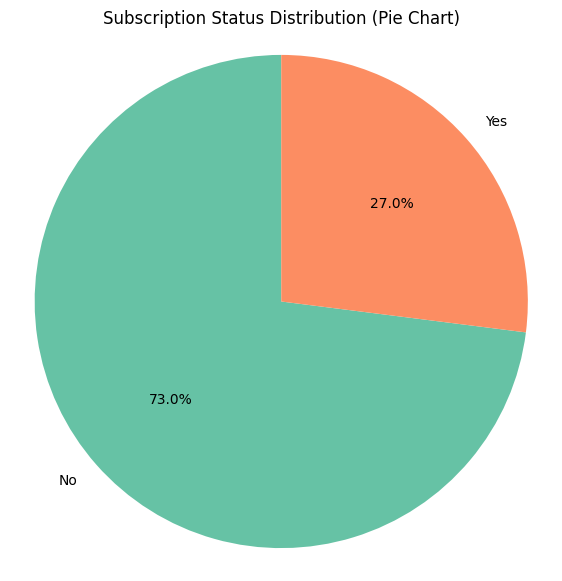

In [43]:
# Plot a pie chart to show the distribution of subscription statuses
plt.figure(figsize=(7, 7))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(subscription_counts)))

# Add title
plt.title('Subscription Status Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [44]:
df['Purchase Amount (USD)'].sum()

233081

In [46]:
# Group by 'Subscription Status' and calculate the mean of 'Purchase Amount (USD)'
subscription_avg_purchase = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean().reset_index()

# Rename the columns for clarity
subscription_avg_purchase.columns = ['Subscription Status', 'Average Purchase Amount (USD)']

# Sort by 'Average Purchase Amount (USD)' in descending order (optional)
subscription_avg_purchase = subscription_avg_purchase.sort_values(by='Average Purchase Amount (USD)', ascending=False)

# Display the result
print(subscription_avg_purchase)

  Subscription Status  Average Purchase Amount (USD)
0                  No                      59.865121
1                 Yes                      59.491928


<ipython-input-47-422efc489bd1>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




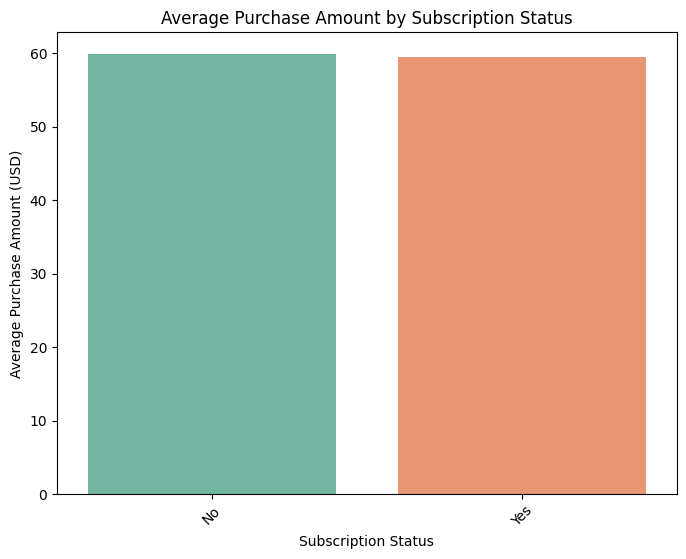

In [47]:
# Create a bar plot for the average purchase amount by subscription status
plt.figure(figsize=(8, 6))
sns.barplot(data=subscription_avg_purchase, x='Subscription Status', y='Average Purchase Amount (USD)', palette='Set2')

# Add labels and title
plt.title('Average Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

In [48]:
# Group by 'Payment Method' and calculate the mean of 'Purchase Amount (USD)'
payment_method_avg_purchase = df.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

# Rename the columns for clarity
payment_method_avg_purchase.columns = ['Payment Method', 'Average Purchase Amount (USD)']

# Sort by 'Average Purchase Amount (USD)' in descending order
payment_method_avg_purchase = payment_method_avg_purchase.sort_values(by='Average Purchase Amount (USD)', ascending=False)

# Display the result
print(payment_method_avg_purchase)

  Payment Method  Average Purchase Amount (USD)
3     Debit Card                      60.915094
2    Credit Card                      60.074516
0  Bank Transfer                      59.712418
1           Cash                      59.704478
4         PayPal                      59.245199
5          Venmo                      58.949527


<ipython-input-49-41f004a4eb9b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




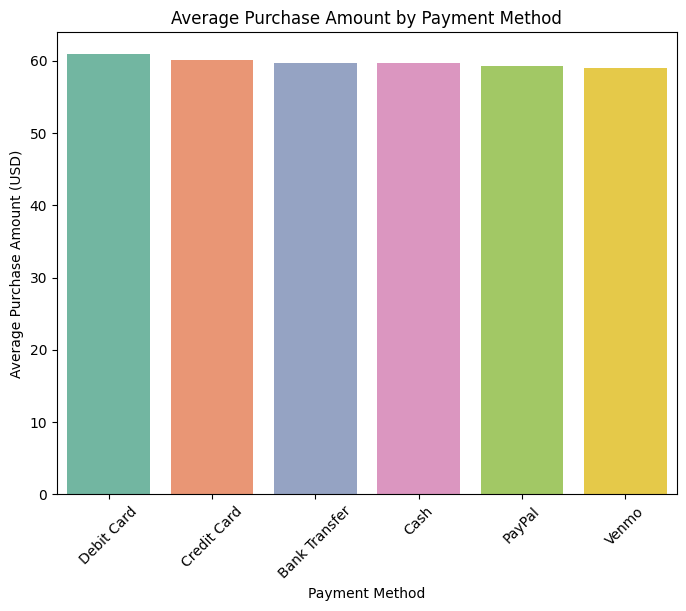

In [49]:
# Create a bar plot for the average purchase amount by payment method
plt.figure(figsize=(8, 6))
sns.barplot(data=payment_method_avg_purchase, x='Payment Method', y='Average Purchase Amount (USD)', palette='Set2')

# Add labels and title
plt.title('Average Purchase Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

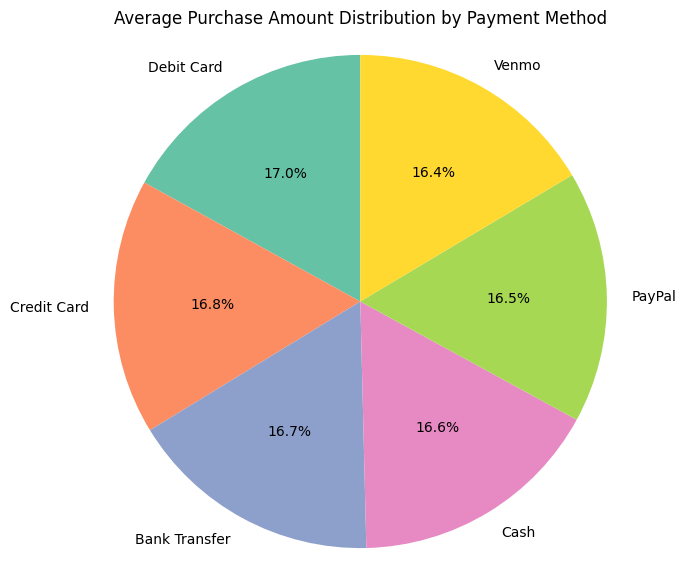

In [50]:
# Plot a pie chart to visualize the distribution of the average purchase amount by payment method
plt.figure(figsize=(7, 7))
plt.pie(payment_method_avg_purchase['Average Purchase Amount (USD)'], labels=payment_method_avg_purchase['Payment Method'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(payment_method_avg_purchase)))

# Add title
plt.title('Average Purchase Amount Distribution by Payment Method')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [51]:
# Group by 'Promo Code Used' and calculate the total 'Purchase Amount (USD)'
promo_code_total_purchase = df.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

# Rename the columns for clarity
promo_code_total_purchase.columns = ['Promo Code Used', 'Total Purchase Amount (USD)']

# Sort by 'Total Purchase Amount (USD)' in descending order to see the most valuable promo codes first
promo_code_total_purchase = promo_code_total_purchase.sort_values(by='Total Purchase Amount (USD)', ascending=False)

# Display the result
print(promo_code_total_purchase)

  Promo Code Used  Total Purchase Amount (USD)
0              No                       133670
1             Yes                        99411


<ipython-input-52-6d128b8f9987>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




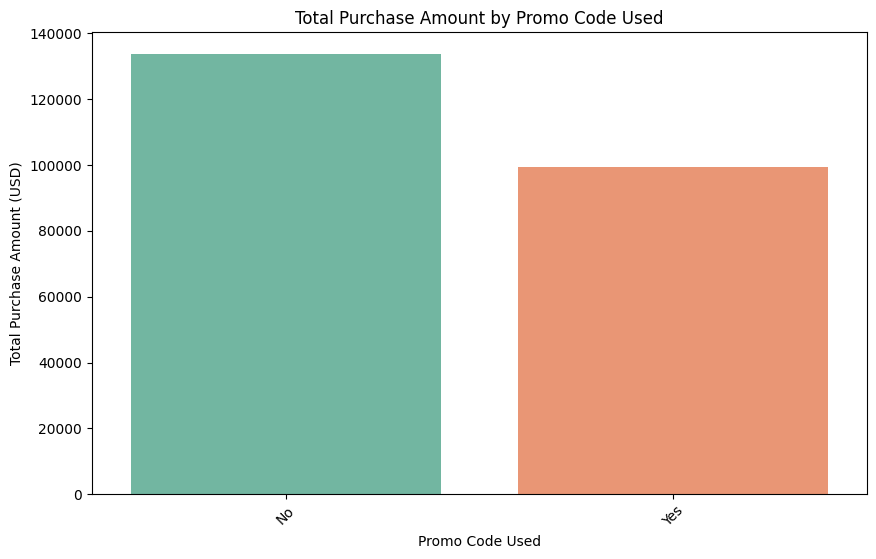

In [52]:
# Create a bar plot for the total purchase amount by promo code used
plt.figure(figsize=(10, 6))
sns.barplot(data=promo_code_total_purchase, x='Promo Code Used', y='Total Purchase Amount (USD)', palette='Set2')

# Add labels and title
plt.title('Total Purchase Amount by Promo Code Used')
plt.xlabel('Promo Code Used')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

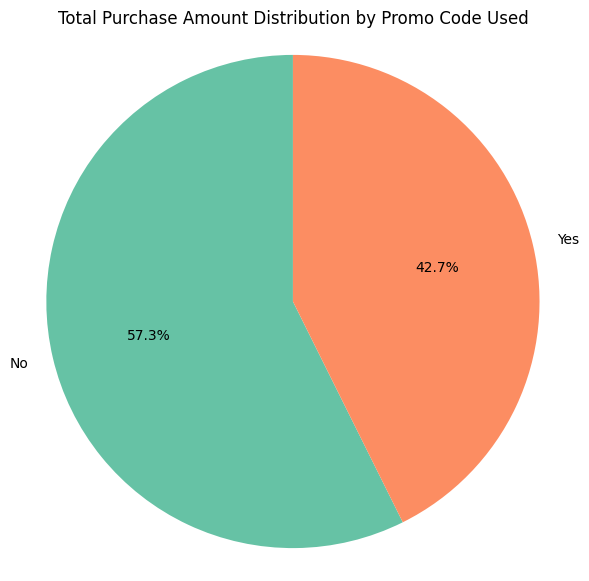

In [53]:
# Plot a pie chart to visualize the distribution of total purchase amounts by promo code
plt.figure(figsize=(7, 7))
plt.pie(promo_code_total_purchase['Total Purchase Amount (USD)'], labels=promo_code_total_purchase['Promo Code Used'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(promo_code_total_purchase)))

# Add title
plt.title('Total Purchase Amount Distribution by Promo Code Used')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [54]:
# Count the number of customers in each 'Age_category'
age_category_counts = df['Age_category'].value_counts().reset_index(name='Count')

# Rename columns for clarity
age_category_counts.columns = ['Age Category', 'Count']

# Display the result
print(age_category_counts)

  Age Category  Count
0  Young Adult   1244
1  Middle-Aged   1121
2        Adult   1111
3       Senior    355
4         Teen     69
5        Child      0


In [55]:
# Group by 'Age_category' and display the summary statistics of 'Age'
age_category_summary = df.groupby('Age_category')['Age'].describe()

# Display the result
print(age_category_summary)

               count       mean       std   min   25%   50%   75%   max
Age_category                                                           
Child            0.0        NaN       NaN   NaN   NaN   NaN   NaN   NaN
Teen            69.0  18.000000  0.000000  18.0  18.0  18.0  18.0  18.0
Young Adult   1244.0  27.037781  4.834778  19.0  23.0  27.0  31.0  35.0
Adult         1111.0  43.055806  4.375870  36.0  39.0  43.0  47.0  50.0
Middle-Aged   1121.0  57.974130  4.283716  51.0  54.0  58.0  62.0  65.0
Senior         355.0  68.073239  1.398239  66.0  67.0  68.0  69.0  70.0


<ipython-input-55-a12746d11c84>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<ipython-input-57-f4ce283aaa54>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




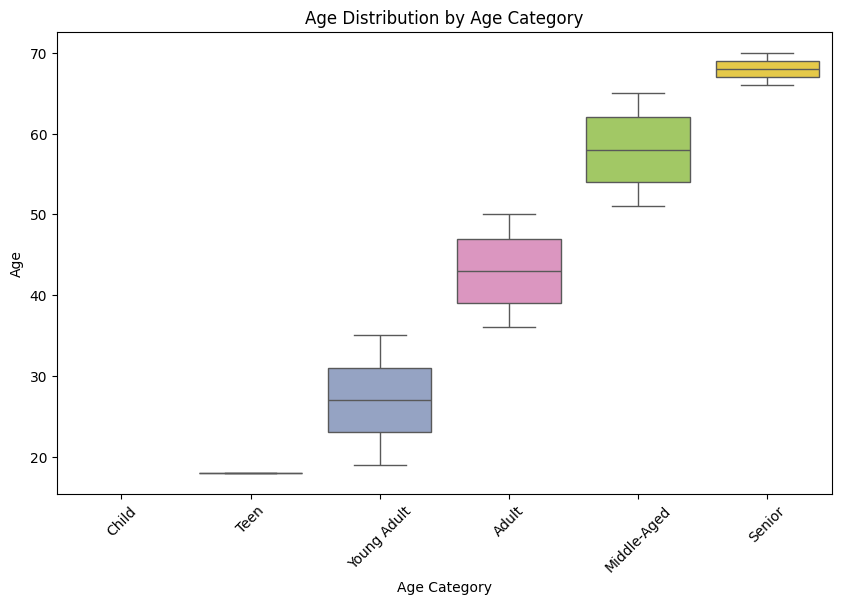

In [57]:
# Create a box plot to visualize the age distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_category', y='Age', palette='Set2')

# Add labels and title
plt.title('Age Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

<ipython-input-58-dfc726fb5257>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




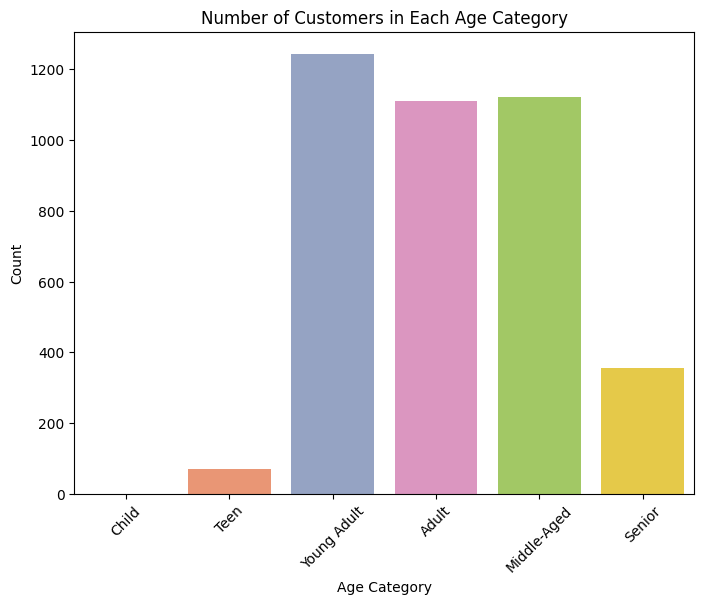

In [58]:
# Create a bar plot to visualize the number of customers in each age category
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age_category', palette='Set2')

# Add labels and title
plt.title('Number of Customers in Each Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [59]:
# Group by 'Size' and calculate the total 'Purchase Amount (USD)'
size_total_purchase = df.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

# Rename the columns for clarity
size_total_purchase.columns = ['Size', 'Total Purchase Amount (USD)']

# Sort by 'Total Purchase Amount (USD)' in descending order to see the most valuable sizes first
size_total_purchase = size_total_purchase.sort_values(by='Total Purchase Amount (USD)', ascending=False)

# Display the result
print(size_total_purchase)

  Size  Total Purchase Amount (USD)
1    M                       105167
0    L                        61667
2    S                        40468
3   XL                        25779


<ipython-input-60-839238c6abff>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




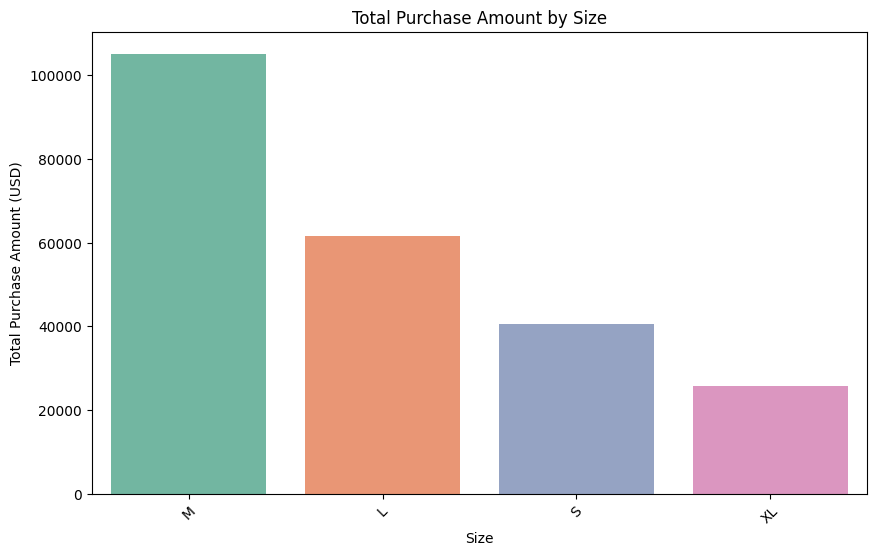

In [60]:
# Create a bar plot for the total purchase amount by size
plt.figure(figsize=(10, 6))
sns.barplot(data=size_total_purchase, x='Size', y='Total Purchase Amount (USD)', palette='Set2')

# Add labels and title
plt.title('Total Purchase Amount by Size')
plt.xlabel('Size')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

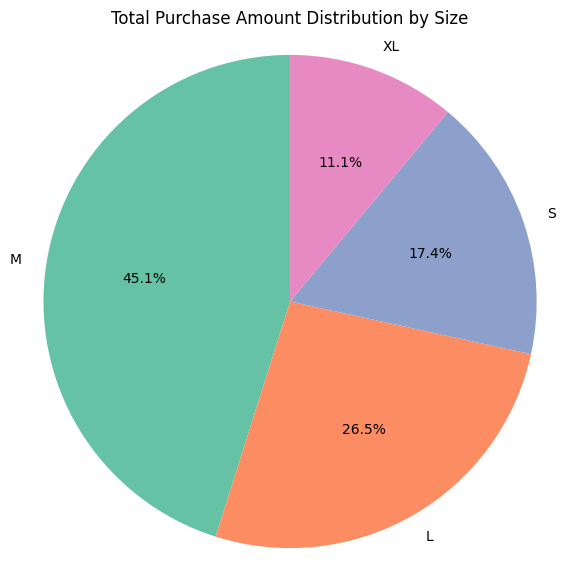

In [61]:
# Plot a pie chart to visualize the distribution of the total purchase amounts by size
plt.figure(figsize=(7, 7))
plt.pie(size_total_purchase['Total Purchase Amount (USD)'], labels=size_total_purchase['Size'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(size_total_purchase)))

# Add title
plt.title('Total Purchase Amount Distribution by Size')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [62]:
# Group by 'Category' and 'Shipping Type', then count occurrences of each combination
category_shipping_counts = df.groupby('Category')['Shipping Type'].value_counts().reset_index(name='Count')

# Sort by 'Count' in descending order to see the most frequent combinations first
category_shipping_counts = category_shipping_counts.sort_values(by='Count', ascending=False)

# Display the result
print(category_shipping_counts)

       Category   Shipping Type  Count
6      Clothing        Standard    297
7      Clothing   Free Shipping    294
8      Clothing    Next Day Air    293
9      Clothing         Express    290
10     Clothing    Store Pickup    282
11     Clothing  2-Day Shipping    281
0   Accessories    Store Pickup    217
1   Accessories    Next Day Air    211
2   Accessories        Standard    208
3   Accessories  2-Day Shipping    206
4   Accessories         Express    203
5   Accessories   Free Shipping    195
12     Footwear   Free Shipping    122
13     Footwear        Standard    100
14     Footwear    Store Pickup     98
15     Footwear         Express     96
16     Footwear    Next Day Air     93
17     Footwear  2-Day Shipping     90
18    Outerwear   Free Shipping     64
19    Outerwear         Express     57
20    Outerwear    Store Pickup     53
21    Outerwear    Next Day Air     51
22    Outerwear  2-Day Shipping     50
23    Outerwear        Standard     49


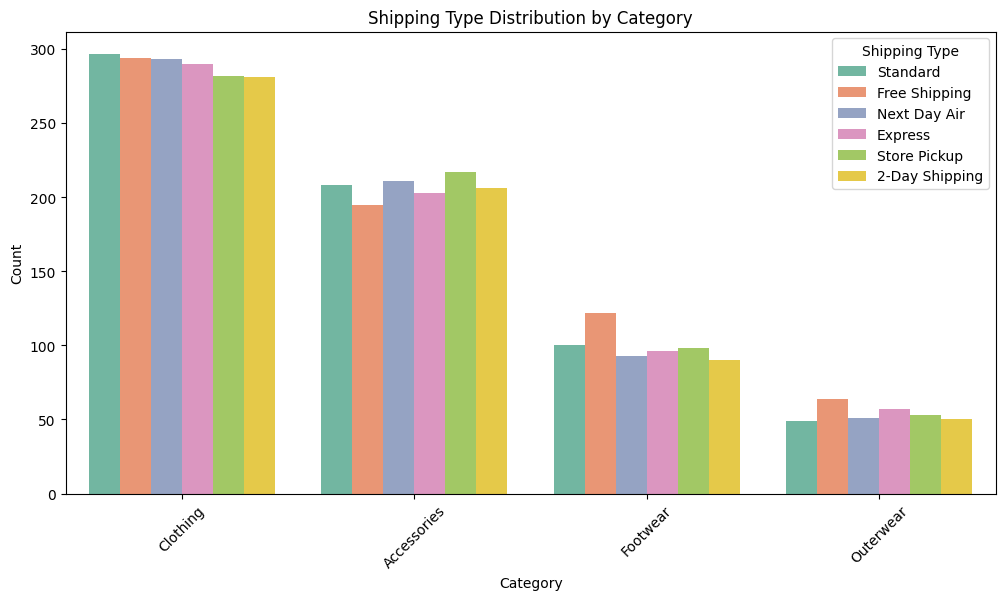

In [63]:
# Create a bar plot to visualize the counts of shipping types within each category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_shipping_counts, x='Category', y='Count', hue='Shipping Type', palette='Set2')

# Add labels and title
plt.title('Shipping Type Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

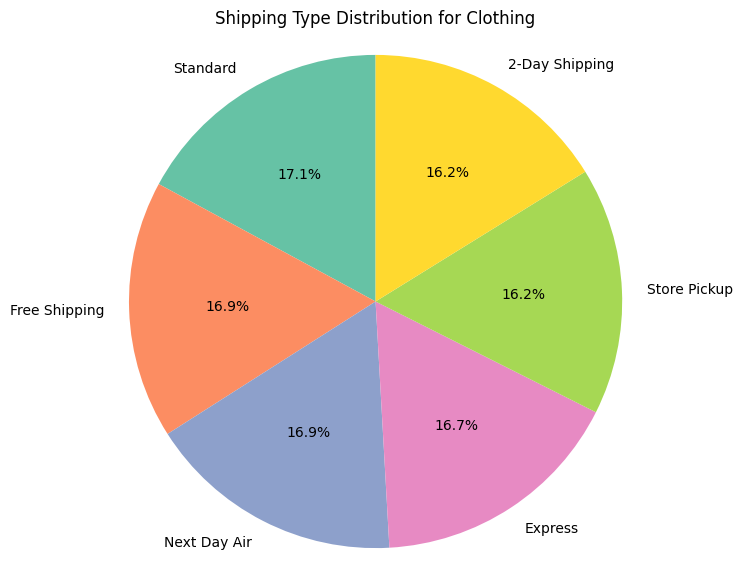

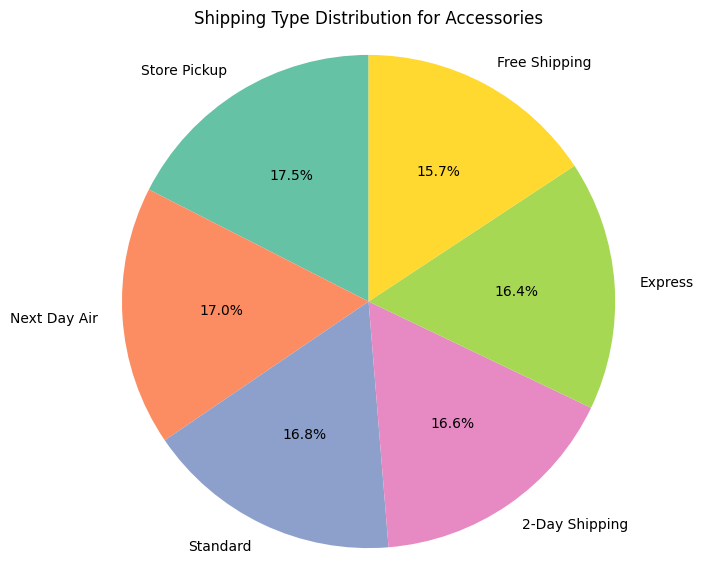

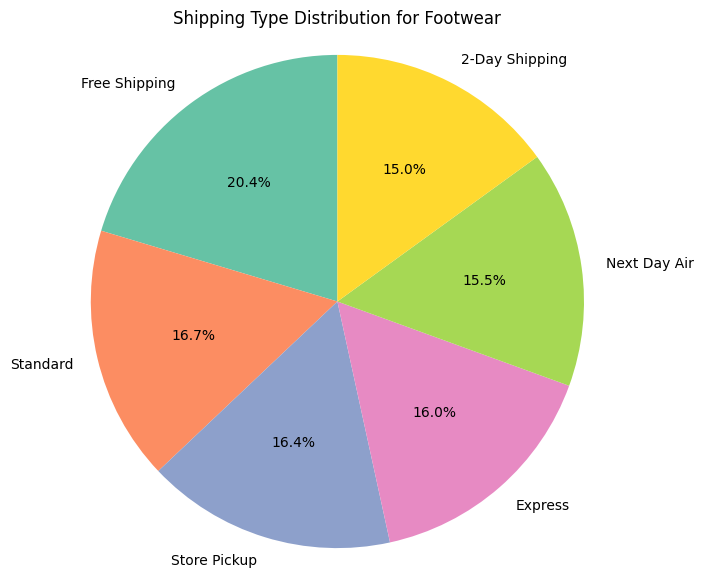

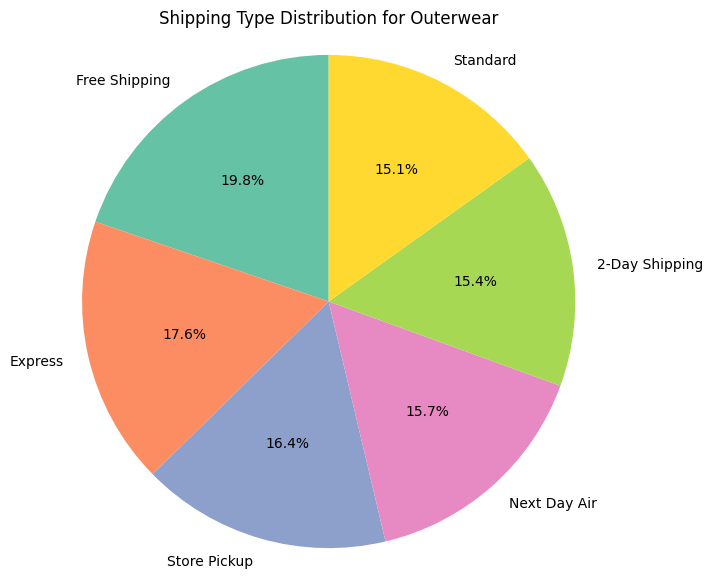

In [64]:
# Loop through each category to plot a pie chart for each shipping type distribution
for category in category_shipping_counts['Category'].unique():
    category_data = category_shipping_counts[category_shipping_counts['Category'] == category]

    plt.figure(figsize=(7, 7))
    plt.pie(category_data['Count'], labels=category_data['Shipping Type'], autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('Set2', len(category_data)))

    plt.title(f'Shipping Type Distribution for {category}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
    plt.show()

In [65]:
# Group by 'Discount Applied' and calculate the total 'Purchase Amount (USD)'
discount_total_purchase = df.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

# Rename columns for better clarity
discount_total_purchase.columns = ['Discount Applied', 'Total Purchase Amount (USD)']

# Sort by 'Total Purchase Amount (USD)' in descending order to see the highest purchase amounts first
discount_total_purchase = discount_total_purchase.sort_values(by='Total Purchase Amount (USD)', ascending=False)

# Display the result
print(discount_total_purchase)

  Discount Applied  Total Purchase Amount (USD)
0               No                       133670
1              Yes                        99411


<ipython-input-66-fdce2227b5d3>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




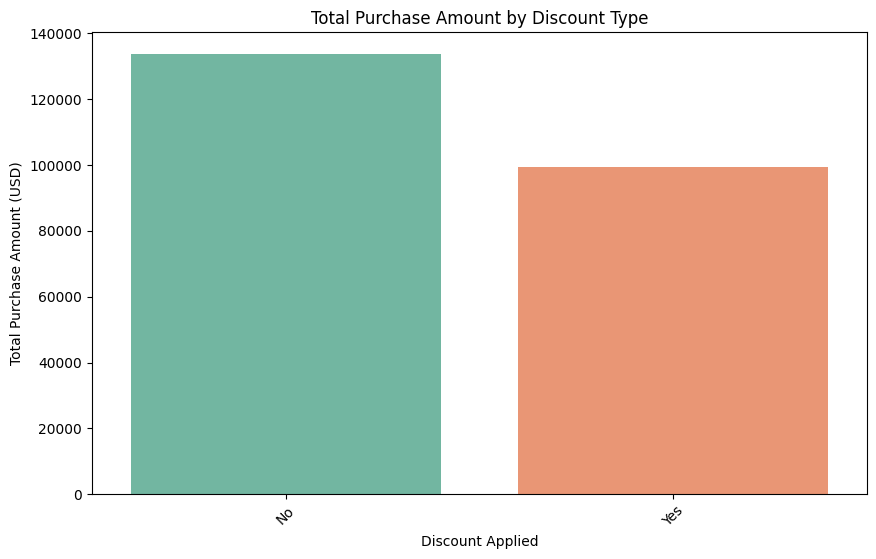

In [66]:
# Create a bar plot for the total purchase amount by discount type
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_total_purchase, x='Discount Applied', y='Total Purchase Amount (USD)', palette='Set2')

# Add labels and title
plt.title('Total Purchase Amount by Discount Type')
plt.xlabel('Discount Applied')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

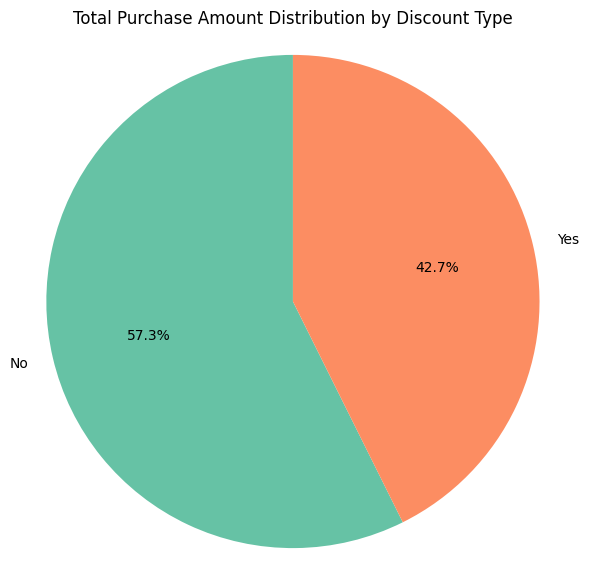

In [67]:
# Plot a pie chart to visualize the distribution of total purchase amounts by discount type
plt.figure(figsize=(7, 7))
plt.pie(discount_total_purchase['Total Purchase Amount (USD)'], labels=discount_total_purchase['Discount Applied'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(discount_total_purchase)))

# Add title
plt.title('Total Purchase Amount Distribution by Discount Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [68]:
# Create a histogram for the 'Color' column
fig = px.histogram(df, x='Color',
                   color='Color',  # Color by the 'Color' column for better differentiation
                   title='Distribution of Colors',  # Add a meaningful title
                   labels={'Color': 'Color Categories', 'count': 'Frequency'},  # Customize axis labels
                   color_discrete_sequence=px.colors.qualitative.Set3)  # Use a color palette

# Show the plot
fig.show()

In [69]:
fig.update_layout(
    xaxis_title='Color Categories',  # Title for x-axis
    yaxis_title='Frequency',  # Title for y-axis
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    bargap=0.2,  # Adjust space between bars
    title_x=0.5,  # Center the title
)

# Show the updated plot
fig.show()

In [70]:
# Calculate the mean of 'Previous Purchases' excluding NaN values
mean_previous_purchases = df['Previous Purchases'].mean()

# Display the result with a descriptive message
print(f"The average number of previous purchases is: {mean_previous_purchases:.2f}")

The average number of previous purchases is: 25.35


In [71]:
# Create a histogram for the 'Previous Purchases' column
fig = px.histogram(df, x='Previous Purchases', title='Distribution of Previous Purchases',
                   labels={'Previous Purchases': 'Number of Previous Purchases'},
                   color_discrete_sequence=['#636EFA'])  # Choose a color for the histogram

# Show the plot
fig.show()

In [72]:
# Group by 'Location' and calculate the average 'Purchase Amount (USD)'
location_avg_purchase = df.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

# Rename the columns for clarity
location_avg_purchase.columns = ['Location', 'Average Purchase Amount (USD)']

# Sort the values by 'Average Purchase Amount (USD)' in descending order
location_avg_purchase = location_avg_purchase.sort_values(by='Average Purchase Amount (USD)', ascending=False)

# Display the result
print(location_avg_purchase)

          Location  Average Purchase Amount (USD)
1           Alaska                      67.597222
37    Pennsylvania                      66.567568
2          Arizona                      66.553846
47   West Virginia                      63.876543
27          Nevada                      63.379310
46      Washington                      63.328767
33    North Dakota                      62.891566
45        Virginia                      62.883117
43            Utah                      62.577465
21        Michigan                      62.095890
41       Tennessee                      61.974026
30      New Mexico                      61.901235
38    Rhode Island                      61.444444
42           Texas                      61.194805
3         Arkansas                      61.113924
12        Illinois                      61.054348
23     Mississippi                      61.037500
20   Massachusetts                      60.888889
14            Iowa                      60.884058


<ipython-input-89-ce2f271b9054>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




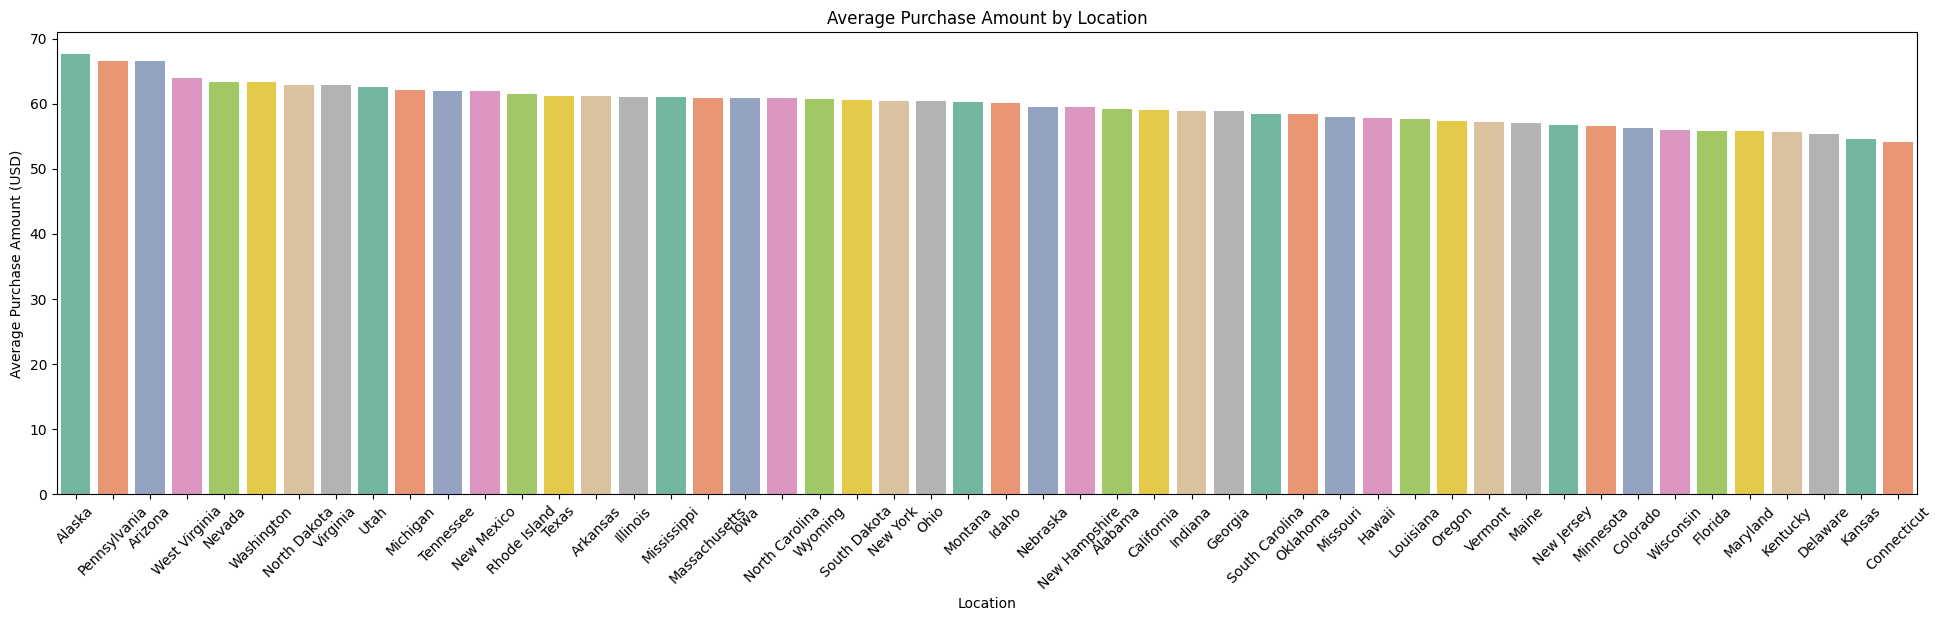

In [89]:
# Create a bar plot for the average purchase amount by location
plt.figure(figsize=(24, 6))
sns.barplot(data=location_avg_purchase, x='Location', y='Average Purchase Amount (USD)', palette='Set2')

# Add labels and title
plt.title('Average Purchase Amount by Location')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

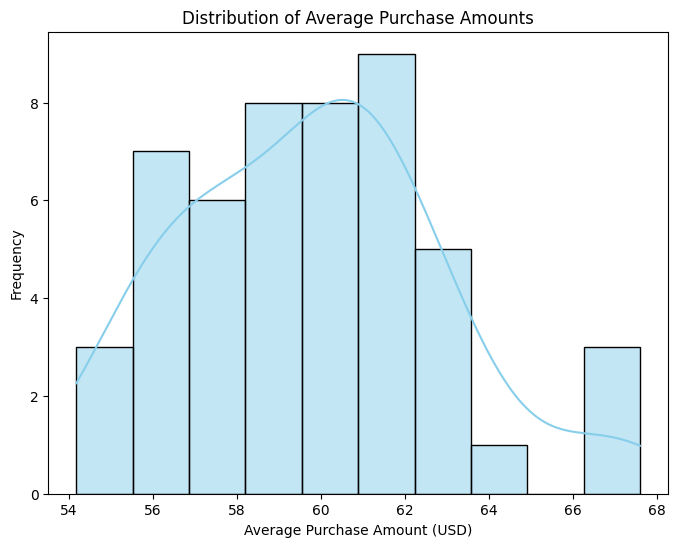

In [76]:
# Create a histogram to show the distribution of average purchase amounts
plt.figure(figsize=(8, 6))
sns.histplot(location_avg_purchase['Average Purchase Amount (USD)'], bins=10, kde=True, color='skyblue')

# Add title and labels
plt.title('Distribution of Average Purchase Amounts')
plt.xlabel('Average Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

In [77]:
# Group by 'Category' and calculate the average 'Age'
category_avg_age = df.groupby('Category')['Age'].mean().reset_index()

# Rename columns for better clarity
category_avg_age.columns = ['Category', 'Average Age']

# Sort the result by 'Average Age' in descending order (optional, but helps identify categories with higher or lower average age)
category_avg_age = category_avg_age.sort_values(by='Average Age', ascending=False)

# Display the result
print(category_avg_age)

      Category  Average Age
2     Footwear    44.442404
3    Outerwear    44.311728
0  Accessories    44.224194
1     Clothing    43.782959


<ipython-input-78-968491e0f218>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




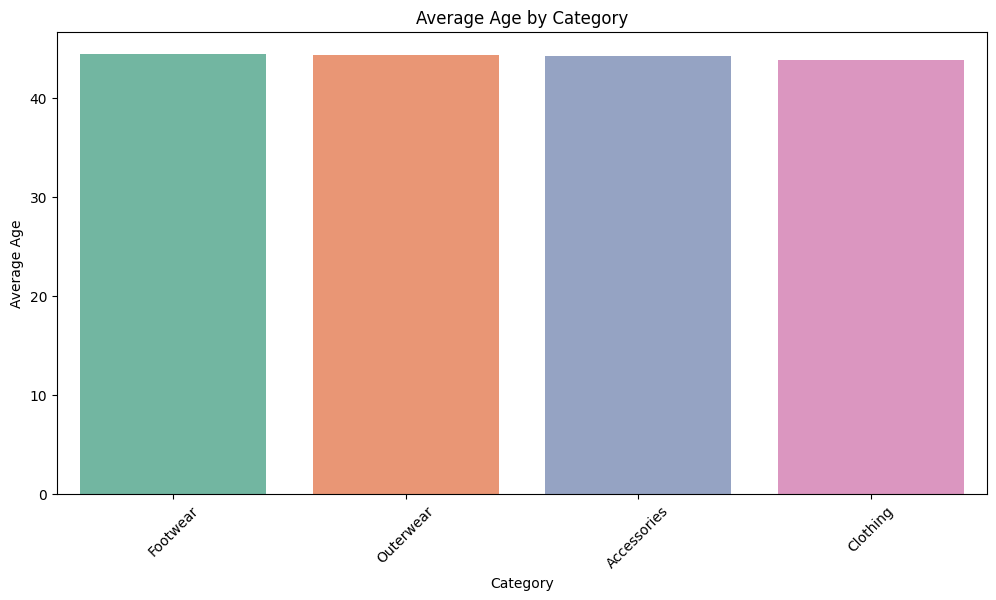

In [78]:
# Create a bar plot for the average age by category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_avg_age, x='Category', y='Average Age', palette='Set2')

# Add labels and title
plt.title('Average Age by Category')
plt.xlabel('Category')
plt.ylabel('Average Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

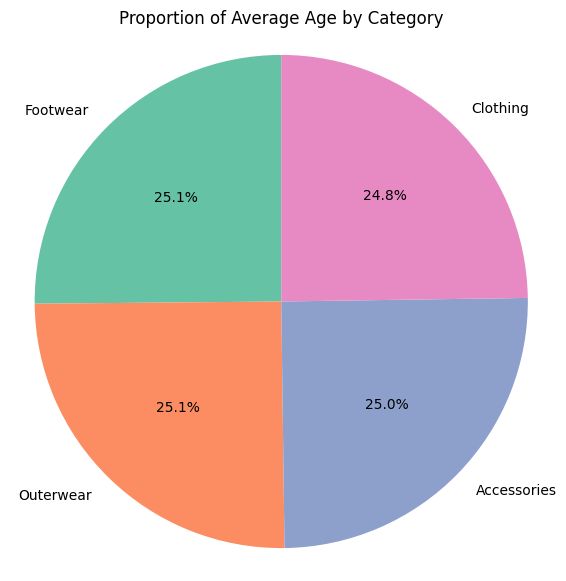

In [79]:
# Plot a pie chart to visualize the proportion of average ages by category
plt.figure(figsize=(7, 7))
plt.pie(category_avg_age['Average Age'], labels=category_avg_age['Category'], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set2', len(category_avg_age)))

# Add title
plt.title('Proportion of Average Age by Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

In [85]:
# Create a sunburst chart to visualize average age by category
fig = px.sunburst(
    data_frame=category_avg_age,  # Assuming category_avg_age contains the average age data
    path=['Category'],             # Define the hierarchy (just the Category in this case)
    values='Average Age',          # Set the average age as the values to be visualized
    title="Sunburst Chart: Average Age by Category"
)

# Show the plot
fig.show()

In [80]:
# Group by 'Gender' and calculate the total 'Purchase Amount (USD)'
gender_total_purchase = df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

# Rename columns for better clarity
gender_total_purchase.columns = ['Gender', 'Total Purchase Amount (USD)']

# Sort by 'Total Purchase Amount (USD)' in descending order to highlight the highest values
gender_total_purchase = gender_total_purchase.sort_values(by='Total Purchase Amount (USD)', ascending=False)

# Display the result
print(gender_total_purchase)

   Gender  Total Purchase Amount (USD)
1    Male                       157890
0  Female                        75191


<ipython-input-81-287e7191aca6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




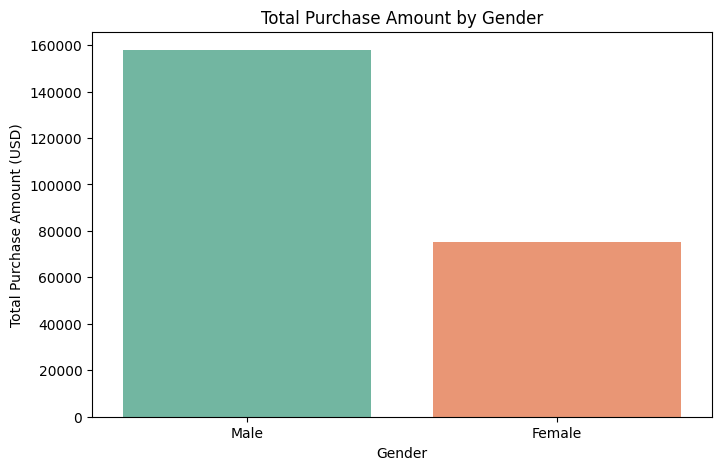

In [81]:
# Create a bar plot for total purchase amount by gender
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_total_purchase, x='Gender', y='Total Purchase Amount (USD)', palette='Set2')

# Add labels and title
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

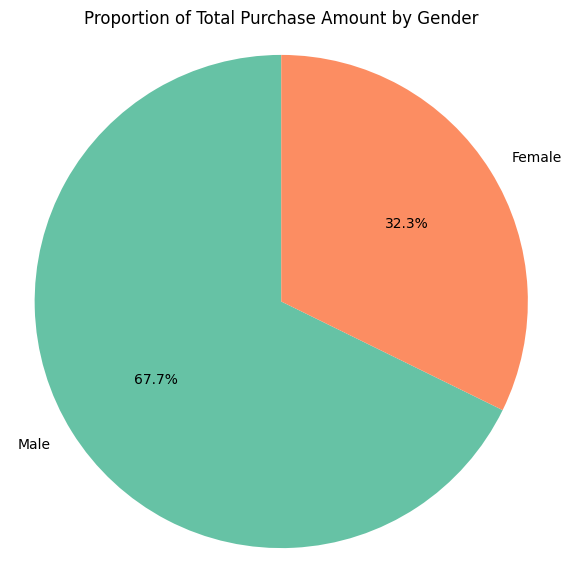

In [83]:
# Plot a pie chart to visualize the proportion of total purchase amounts by gender
plt.figure(figsize=(7, 7))
plt.pie(gender_total_purchase['Total Purchase Amount (USD)'], labels=gender_total_purchase['Gender'], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set2', len(gender_total_purchase)))

# Add title
plt.title('Proportion of Total Purchase Amount by Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

In [84]:
# Create the sunburst chart with Gender and Age_category as hierarchy, and Purchase Amount (USD) as values
fig = px.sunburst(data_frame=df, path=['Gender', 'Age_category'], values='Purchase Amount (USD)')

# Show the plot
fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<ipython-input-86-f062f860d62f>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




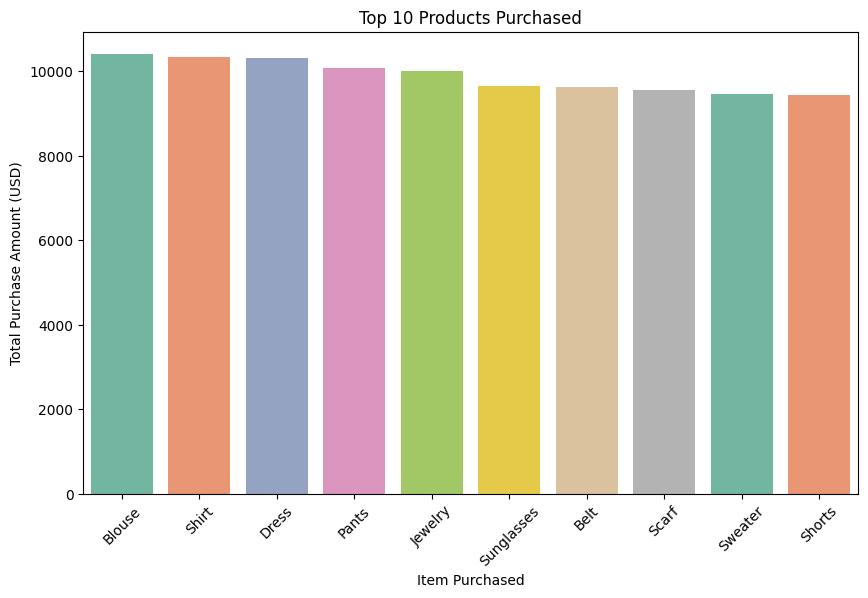

In [86]:
# Group by Item Purchased and calculate total purchase amount
item_purchase = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

# Sort by total purchase amount in descending order and show top 10 items
top_items = item_purchase.sort_values(by='Purchase Amount (USD)', ascending=False).head(10)

# Plot a bar chart for top 10 items purchased
plt.figure(figsize=(10, 6))
sns.barplot(data=top_items, x='Item Purchased', y='Purchase Amount (USD)', palette='Set2')
plt.title('Top 10 Products Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-90-511d8036ed1c>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-90-511d8036ed1c>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




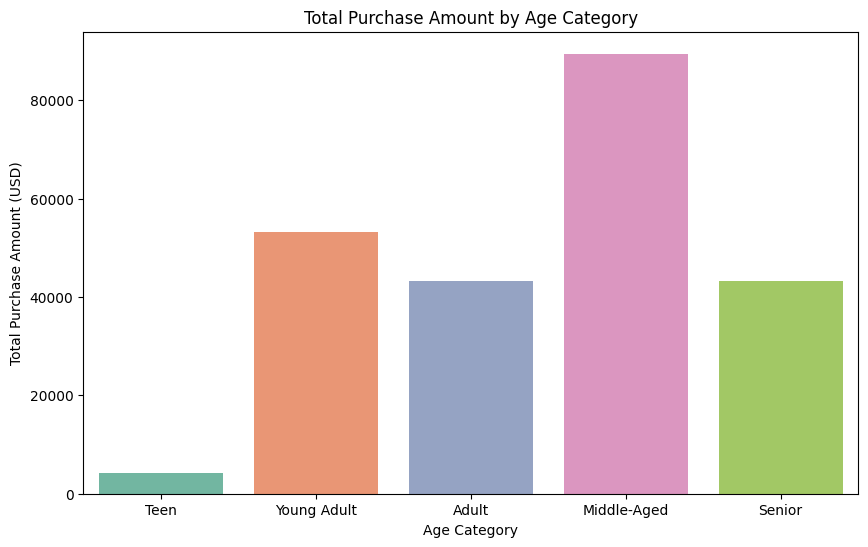

In [90]:
# Create age categories using bins
df['Age_category'] = pd.cut(df['Age'], bins=[0, 18, 30, 40, 60, 100], labels=['Teen', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior'])

# Group by Age Category and calculate the total purchase amount
age_category_purchase = df.groupby('Age_category')['Purchase Amount (USD)'].sum().reset_index()

# Plot a bar chart for purchase amount by age category
plt.figure(figsize=(10, 6))
sns.barplot(data=age_category_purchase, x='Age_category', y='Purchase Amount (USD)', palette='Set2')
plt.title('Total Purchase Amount by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # You can use any classification model here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Assuming your 'df' DataFrame is already loaded
# Step 1: Create target variable y (binary: Purchase > $50 or not)
df['Purchase_Target'] = (df['Purchase Amount (USD)'] > 50).astype(int)  # 1 if purchase > $50, 0 otherwise

# Step 2: Select relevant features (drop any non-relevant or categorical columns for simplicity)
X = df[['Age', 'Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status',
        'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Frequency of Purchases']]

# Step 3: One-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)

# Step 4: Target variable
y = df['Purchase_Target']

# Step 5: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize features (important for some models like SVM, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Assuming df is already preprocessed, with one-hot encoding done and data split into X_train_scaled and X_test_scaled
# Let's initialize and train GradientBoostingClassifier

# Step 1: Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Step 2: Fit the model on the training data
gb_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the test set
y_pred = gb_model.predict(X_test_scaled)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.2f}')

Accuracy: 0.59
Precision: 0.59
Recall: 0.93
F1-Score: 0.73
Confusion Matrix:
[[ 35 291]
 [ 30 424]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.11      0.18       326
           1       0.59      0.93      0.73       454

    accuracy                           0.59       780
   macro avg       0.57      0.52      0.45       780
weighted avg       0.57      0.59      0.50       780

ROC-AUC Score: 0.52


In [100]:
# Step 1: Set up the hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.05, 0.1],  # Step size at each iteration while moving toward a minimum of a loss function
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples to be used for fitting trees
}

# Step 2: Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Step 3: Fit the grid search to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Step 4: Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Step 5: Use the best model found by GridSearchCV
best_gb_model = grid_search.best_estimator_

# Step 6: Make predictions with the tuned model
y_pred_best = best_gb_model.predict(X_test_scaled)

# Step 7: Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_best:.2f}')

precision_best = precision_score(y_test, y_pred_best)
print(f'Best Model Precision: {precision_best:.2f}')

recall_best = recall_score(y_test, y_pred_best)
print(f'Best Model Recall: {recall_best:.2f}')

f1_best = f1_score(y_test, y_pred_best)
print(f'Best Model F1-Score: {f1_best:.2f}')

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
print('Confusion Matrix (Best Model):')
print(cm_best)

# Classification Report
report_best = classification_report(y_test, y_pred_best)
print('Classification Report (Best Model):')
print(report_best)

# ROC-AUC Score
roc_auc_best = roc_auc_score(y_test, y_pred_best)
print(f'ROC-AUC Score (Best Model): {roc_auc_best:.2f}')

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best Model Accuracy: 0.58
Best Model Precision: 0.58
Best Model Recall: 1.00
Best Model F1-Score: 0.74
Confusion Matrix (Best Model):
[[  1 325]
 [  0 454]]
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       326
           1       0.58      1.00      0.74       454

    accuracy                           0.58       780
   macro avg       0.79      0.50      0.37       780
weighted avg       0.76      0.58      0.43       780

ROC-AUC Score (Best Model): 0.50


In [102]:
# Step 1: Standardize features using the fitted scaler from previous cells
scaler = StandardScaler()  # Create a new scaler or use existing one if already defined
X_scaled = scaler.fit_transform(X) #Fit and transform your original feature data 'X'

# Step 2: Perform Cross-validation using the scaled data
cv_scores = cross_val_score(best_gb_model, X_scaled, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Cross-Validation Accuracy: 0.61 ± 0.00
